In [4]:
# 导入相关的包
import tensorflow as tf

from tensorflow import data as tfdata
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow import losses
from tensorflow.keras import initializers as init

from tensorflow.keras.utils import plot_model

In [7]:
# 生成随机数据
def getData(num_samples, num_dim, w_real, b_real):
    # 满足正太分布的随机数据
    features = tf.random.normal((num_samples, num_dim), stddev=1)
    # 真实数据
    lables = features[:,0]*w_real[0] + features[:,1]*w_real[1] + b_real
    # 给lables加上噪声
    lables += tf.random.normal(lables.shape, stddev=0.01)

    return features, lables



In [8]:
num_samples = 1000
num_dim = 2
w_real = [2, -3.4]
b_real = 4.14

features, lables = getData(num_samples, num_dim, w_real, b_real)

tf.Tensor(0.157906, shape=(), dtype=float32)
(1000,)


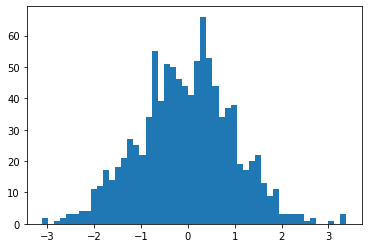

In [18]:
print(features[:, 1][0])
print(lables.shape)

import matplotlib.pyplot as plt
plt.hist(features[:, 1], 50)
plt.show()

In [22]:
# 设置网络结构
model = keras.Sequential()

# 一层全链接层,初始化参数满足正态分布
model.add(layers.Dense(1, kernel_initializer=init.RandomNormal(stddev=0.01)))
# loss函数： MSE
loss = losses.MeanSquaredError()
# 优化器： 随机梯度下降
trainer = optimizers.SGD(learning_rate=0.03)

plot_model(model)
# 设置数据集和小批量的样本数
batch_size = 10
dataset = tfdata.Dataset.from_tensor_slices((features, lables))
dataset = dataset.shuffle(len(features)).batch(batch_size)

In [23]:
# 训练过程
num_epochs = 3
for epoch in range(1, num_epochs+1):
    # 按batch进行计算
    for (batch, (X, y)) in enumerate(dataset):
        with tf.GradientTape() as tape:
            l = loss(model(X, training=True), y)
        # 计算梯度并更新参数
        grads = tape.gradient(l, model.trainable_variables)
        trainer.apply_gradients(zip(grads, model.trainable_variables))
    
    # 迭代后的总loss
    l = loss(model(features), lables)
    print('epoch:%d \t loss:%f'%(epoch, l.numpy().mean()))



epoch:1 	 loss:0.000356
epoch:2 	 loss:0.000103
epoch:3 	 loss:0.000102


In [25]:
print(model.get_weights())

[array([[ 1.9999523],
       [-3.399644 ]], dtype=float32), array([4.139644], dtype=float32)]
